In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Nifty 50 1 日.txt', sep=',', delimiter=',')

data.columns = [
    'Date', 'Time', 'Open', 'High', 'Low', 'Close', 'Volume'
]

data.drop(columns=['Time'], inplace=True)
data.Date = data.Date.apply(lambda x: datetime.strptime(x, "%m/%d/%Y"))

# 繪製box plot

In [3]:
high_and_low = data[['Date', 'High', 'Low']]
high_and_low  = high_and_low .copy()
high_and_low['difference'] = high_and_low.High - high_and_low.Low
high_and_low.index = high_and_low.Date

open_and_close = data[['Date', 'Open', 'Close']]
open_and_close  = open_and_close .copy()
open_and_close['difference'] = abs(open_and_close.Open - open_and_close.Close)
open_and_close.index = open_and_close.Date

date_index = pd.DataFrame(high_and_low.index)
date_index['year'] = date_index.Date.apply(lambda x: x.year)
y_number_per_year = date_index.groupby('year').count()['Date'].values
years = date_index.year.unique()

x_index = []
for i in range(len(years)):
    temp = [years[i]]*y_number_per_year[i]
    x_index.extend(temp)

In [4]:
import plotly.plotly as py
import plotly.graph_objs as go

trace_1 = go.Box(
    x=x_index,
    y=high_and_low['difference'],
    name='High minus Low',
    boxmean=True
)

trace_2 = go.Box(
    x=x_index,
    y=open_and_close['difference'],
    name='Distance betweeen <br>Open and Close',
    boxmean=True
)

layout = go.Layout(
    # 有些吃go物件有些直接指定
    title='SCN: High minus Low vs Distance betweeen Open and Close <br> (standard trading hours)',
    
    titlefont={
        'size':20,
        'color':'grey'
    },
    
    xaxis=go.layout.XAxis(
        showgrid=False,
        zeroline=True,
        showticklabels=True,
        gridcolor='Lightgrey'
    ),
    
    yaxis=go.layout.YAxis(
        showgrid=True,
        zeroline=False,
        showticklabels=True,
        gridcolor='Lightgrey',
        tick0=0,
        dtick=200
    ),
    
    boxmode='group',
    
    legend=go.layout.Legend(
        xanchor='right',
        yanchor='top',
        font={'size': 15},
        bordercolor='black',
        borderwidth=0.5
    ),
    
    paper_bgcolor='rgb(255,255,255)',
    
    plot_bgcolor='rgb(255,255,255)'

)

data_plotly = [trace_1, trace_2]

fig = go.Figure(data_plotly, layout=layout)
py.iplot(fig, filename='TXF K bar distrubition')

In [5]:
high_and_low.difference.idxmax()

Timestamp('2019-09-20 00:00:00')

# KDE plot

In [15]:
data['Volatility'] =  data['High'] - data['Low']
data['Solid_vol'] = abs(data['Close'] - data['Open'])
data['Ratio'] = data['Solid_vol'] / data['Volatility']

data['year'] = data.Date.apply(lambda x: x.year)

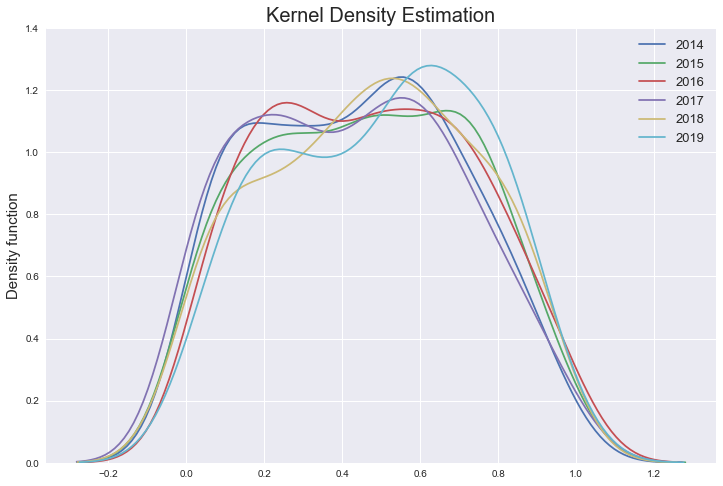

In [16]:
plt.figure(figsize=(12, 8))
plt.ylim(0, 1.4)
plt.style.use('seaborn')
for year in range(2014, 2020):
    sns.kdeplot(data[data.year == year]['Ratio'], label=year, kernel='gau')
plt.legend(fontsize=13)
plt.title('Kernel Density Estimation', fontsize=20)
plt.ylabel('Density function', fontsize=15);

In [17]:
data['category'] = pd.cut(
    data.Ratio, np.arange(0, 1.05, 0.05), include_lowest=True, labels=np.arange(1, 21, 1)
)

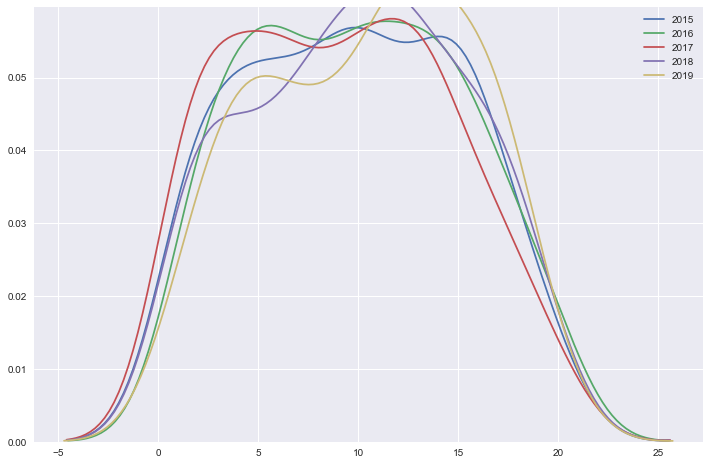

In [18]:
plt.figure(figsize=(12, 8))
plt.style.use('seaborn')
for year in range(2015, 2020):
    sns.kdeplot(data[data.year == year]['category'], label=year)

In [19]:
data.groupby('year').mean()['Volatility']

year
2014     82.227969
2015    113.718391
2016     99.178161
2017     77.357692
2018    114.865900
2019    138.764706
Name: Volatility, dtype: float64

In [20]:
data.groupby('year').mean()['Solid_vol']

year
2014    38.944444
2015    57.917625
2016    50.385057
2017    35.123077
2018    59.053640
2019    74.213235
Name: Solid_vol, dtype: float64

In [21]:
data.groupby('year').mean()['Ratio']

year
2014    0.440503
2015    0.461955
2016    0.470531
2017    0.428606
2018    0.473622
2019    0.496243
Name: Ratio, dtype: float64

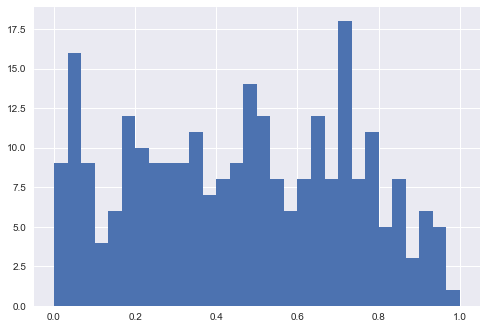

In [22]:
year = 2015
plt.hist(data[data.year == year]['Ratio'], bins=30);

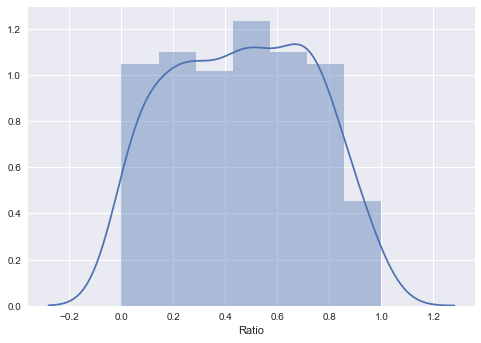

In [23]:
sns.distplot(data[data.year == year]['Ratio'])

# Reference
https://github.com/Andy-Liu66/Visualization_use_cases/tree/master/Taiwan%20future%20market%20price%20structure